In [1]:
import os

In [2]:
# check if kernel knows GPU
import tensorflow as tf
if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
data_dir = 'C:\\Users\Li-mu\\Downloads\\animal classifier\\raw-img'

In [4]:
os.listdir(data_dir)

['cat', 'chicken', 'cow', 'dog', 'horse', 'sheep', 'squirrel']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib.image import imread

In [7]:
data_dir

'C:\\Users\\Li-mu\\Downloads\\animal classifier\\raw-img'

In [8]:
labels = os.listdir(data_dir)

In [9]:
# removed butterfly, elephant, spider due to errors reading or not animal
labels

['cat', 'chicken', 'cow', 'dog', 'horse', 'sheep', 'squirrel']

In [10]:
# checking to see if path works
cat_img = data_dir + '\\' + labels[0] + '\\' + '1.jpeg'

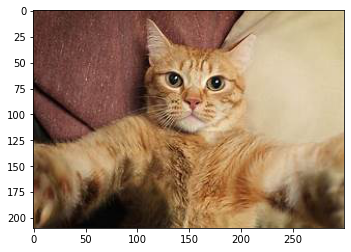

In [11]:
plt.imshow(imread(cat_img))

In [12]:
# get dimensions for all images
dim1 = []
dim2 = []

# go through each folder under raw-img; cat, chicken, cow...
for label in labels:
    for image_filename in os.listdir(data_dir+'\\'+label):
        img = plt.imread(data_dir+'\\'+label+'\\'+image_filename)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

In [13]:
# total images
len(dim1)

17800

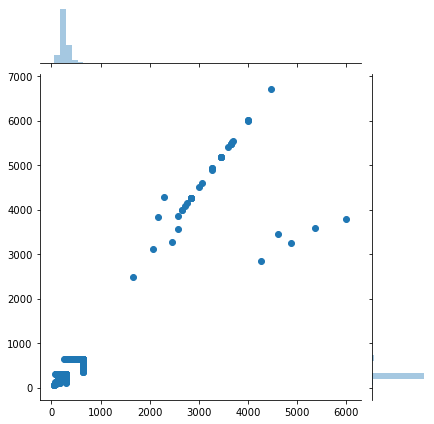

In [14]:
# image resolution plot
sns.jointplot(dim1,dim2)

In [15]:
# avarage dimension
np.mean(dim1)

248.82314606741573

In [16]:
np.mean(dim2)

312.4890449438202

In [17]:
# the average is about 250, 315, 3(RGB) channel, but i will use 256,256 for dimension
image_shape = (256,256,3)

In [18]:
# very big array
256*256*3

196608

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
# add randomness to training
# https://keras.io/preprocessing/image/
# https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              rescale=1/255,  # rescale to 0-1
                              fill_mode='nearest',  # fill pixels with nearest value
                              validation_split=0.25)  # for splitting images to 25% testing

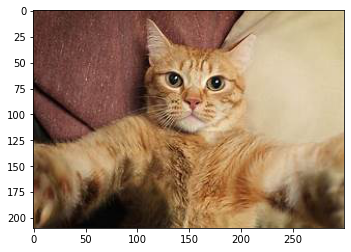

In [21]:
# original image
plt.imshow(imread(cat_img))

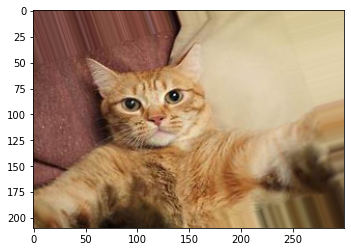

In [22]:
# after image_gen's randomness
plt.imshow(image_gen.random_transform(imread(cat_img)))

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [25]:
# create model
# https://www.udemy.com/course/complete-tensorflow-2-and-keras-deep-learning-bootcamp
model = Sequential()

# multiple filter layers
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 512)       1

In [27]:
# early stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [29]:
# batch size
batch_size = 32

In [30]:
# split images for training
# https://keras.io/preprocessing/image/
# https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator
train_generator = image_gen.flow_from_directory(data_dir,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               subset='training')

Found 13353 images belonging to 7 classes.


In [31]:
# split images for testing
validation_generator = image_gen.flow_from_directory(data_dir,
                                                    target_size=image_shape[:2],
                                                    batch_size=batch_size,
                                                    subset='validation',
                                                    shuffle=False)

Found 4447 images belonging to 7 classes.


In [32]:
train_generator.class_indices

{'cat': 0,
 'chicken': 1,
 'cow': 2,
 'dog': 3,
 'horse': 4,
 'sheep': 5,
 'squirrel': 6}

In [40]:
results = model.fit_generator(train_generator,
                    epochs = 32,
                    callbacks=[early_stop],
                    validation_data=validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 418 steps, validate for 139 steps
Epoch 1/32
418/418 [==============================] - 226s 540ms/step - loss: 1.8581 - accuracy: 0.2790 - val_loss: 1.6834 - val_accuracy: 0.3645
Epoch 2/32
418/418 [==============================] - 226s 541ms/step - loss: 1.5606 - accuracy: 0.3998 - val_loss: 1.3683 - val_accuracy: 0.4653
Epoch 3/32
418/418 [==============================] - 225s 538ms/step - loss: 1.4001 - accuracy: 0.4685 - val_loss: 1.2641 - val_accuracy: 0.5350
Epoch 4/32
418/418 [==============================] - 225s 538ms/step - loss: 1.2903 - accuracy: 0.5233 - val_loss: 1.1477 - val_accuracy: 0.5714
Epoch 5/32
418/418 [==============================] - 226s 541ms/step - loss: 1.2119 - accuracy: 0.5568 - val_loss: 1.1053 - val_accuracy: 0.5979
Epoch 6/32
418/418 [==============================] - 220s 525ms/step - loss: 1.1469 - accuracy: 0.5856 - val_loss: 1.0364 - val_accuracy: 0.6188
Epoch 7/32
418/418 [==========

In [41]:
model.save('model7.h5')

In [33]:
# already ran before, but restarted notebook, don't want to go through hours just to make this work again
history = pd.DataFrame(model.history.history)

AttributeError: 'Sequential' object has no attribute 'history'

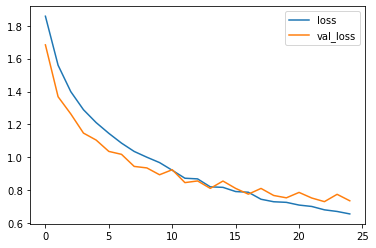

In [43]:
# training and validation loss
history[['loss', 'val_loss']].plot()

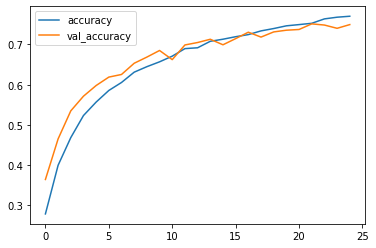

In [44]:
# training and validation accuracy
history[['accuracy','val_accuracy']].plot()

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model = load_model('model7.h5')

In [37]:
model.evaluate(train_generator)

  ...
    to  
  ['...']
418/418 [==============================] - 171s 409ms/step - loss: 0.6102 - accuracy: 0.7868


[0.6102340182547934, 0.7867895]

In [38]:
pred = model.predict_classes(validation_generator, batch_size=None)

In [39]:
print(classification_report(validation_generator.classes,pred,target_names=labels))

              precision    recall  f1-score   support

         cat       0.71      0.63      0.66       417
     chicken       0.86      0.86      0.86       774
         cow       0.65      0.63      0.64       466
         dog       0.80      0.72      0.76      1215
       horse       0.69      0.84      0.75       655
       sheep       0.66      0.72      0.69       455
    squirrel       0.74      0.75      0.74       465

    accuracy                           0.75      4447
   macro avg       0.73      0.73      0.73      4447
weighted avg       0.75      0.75      0.75      4447



In [40]:
test_img = image.load_img(cat_img,target_size=image_shape)

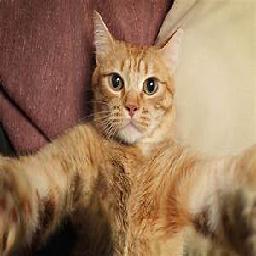

In [41]:
test_img

In [42]:
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
model.predict_classes(test_img)

array([0], dtype=int64)

In [43]:
# as you can see it can predict cat
labels

['cat', 'chicken', 'cow', 'dog', 'horse', 'sheep', 'squirrel']

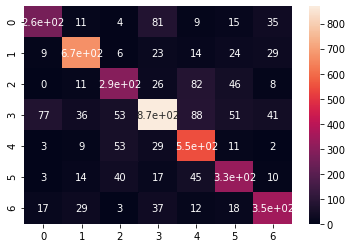

In [46]:
sns.heatmap(confusion_matrix(validation_generator.classes, pred), annot=True)

In [47]:
# the left is the true label, and bottom is the predicted label
# so for example, the first row, 0 is being predicted as 3 a lot
# this means that the model thinks the cat is a dog
# another example is the row of 2, cow is being tested as horses
# for row of 3, dog is being tested as cats...

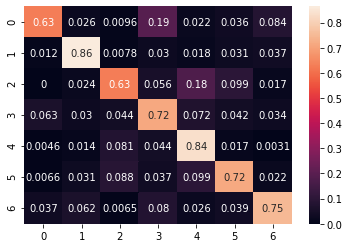

In [51]:
# this is the same heatmap as above, but in percentage
sns.heatmap(confusion_matrix(validation_generator.classes, pred,normalize='true'), annot=True)

In [52]:
train_generator.class_indices

{'cat': 0,
 'chicken': 1,
 'cow': 2,
 'dog': 3,
 'horse': 4,
 'sheep': 5,
 'squirrel': 6}

In [53]:
# the precision isn't good, but for the most part, the model can predict the animal from image